In [4]:
     from google.colab import files
     uploaded = files.upload()

Saving jewelry.csv to jewelry.csv


In [5]:
# Load the jewelry.csv file and perform an initial analysis for key insights
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('jewelry.csv', encoding='ascii')

# Show the head and column types for initial inspection
print(df.head())
print(df.dtypes)

   2018-12-01 11:40:29 UTC  1924719191579951782  1842195256808833386  1  \
0  2018-12-01 17:38:31 UTC  1924899396621697920  1806829193678291446  1   
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556  1   
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453  1   
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865  1   
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449  1   

   1806829201890738522   jewelry.earring    0  561.51  1515915625207851155  \
0         1.806829e+18               NaN  NaN  212.14         1.515916e+18   
1         1.806829e+18   jewelry.pendant  1.0   54.66         1.515916e+18   
2         1.806829e+18   jewelry.pendant  0.0   88.90         1.515916e+18   
3         1.806829e+18  jewelry.necklace  0.0  417.67         1.515916e+18   
4         1.806829e+18   jewelry.earring  1.0  102.27         1.515916e+18   

  Unnamed: 9     red  gold   diamond  
0        NaN  yellow  gold       NaN  
1 

**Description:**
The code snippet is designed for initial data inspection of a jewelry dataset. It begins by loading the `jewelry.csv` file into a Pandas DataFrame. After loading, it displays the first few rows of the dataset to give a quick overview of the records. Finally, it prints the data types of each column to help understand the structure and format of the data, which is essential for further analysis and processing.


In [6]:
# Fix the header issue - the first row contains data, not headers
# Based on the preview, I can see the columns should be renamed properly

# First, let's see the shape and examine the data structure
print("Original shape:", df.shape)
print("First few rows:")
print(df.head())

# The columns appear to be: timestamp, id1, id2, quantity, id3, jewelry_type, binary_flag, price, id4, gender, color, material, gemstone
# Let's rename the columns properly
df.columns = ['timestamp', 'transaction_id', 'product_id', 'quantity', 'customer_id',
              'jewelry_type', 'binary_flag', 'price', 'session_id', 'gender',
              'color', 'material', 'gemstone']

print("After renaming columns:")
print(df.head())
print("Data types:")
print(df.dtypes)

Original shape: (95910, 13)
First few rows:
   2018-12-01 11:40:29 UTC  1924719191579951782  1842195256808833386  1  \
0  2018-12-01 17:38:31 UTC  1924899396621697920  1806829193678291446  1   
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556  1   
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453  1   
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865  1   
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449  1   

   1806829201890738522   jewelry.earring    0  561.51  1515915625207851155  \
0         1.806829e+18               NaN  NaN  212.14         1.515916e+18   
1         1.806829e+18   jewelry.pendant  1.0   54.66         1.515916e+18   
2         1.806829e+18   jewelry.pendant  0.0   88.90         1.515916e+18   
3         1.806829e+18  jewelry.necklace  0.0  417.67         1.515916e+18   
4         1.806829e+18   jewelry.earring  1.0  102.27         1.515916e+18   

  Unnamed: 9     red  gold   diamond

**Description**
This code snippet focuses on preparing and exploring a jewelry dataset by performing several foundational data analysis tasks. It begins by converting the `'timestamp'` column to a proper datetime format, enabling time-based operations. Then, it prints the shape of the dataset to show the number of rows and columns. To assess data quality, it checks for any missing values. The code also provides basic statistical insights into the `'price'` column, such as mean, median, and standard deviation. Additionally, it analyzes the categorical distribution by counting the occurrences of each jewelry type, color, material, and gemstone, helping understand the composition of the dataset.


In [7]:
# Convert timestamp to datetime and perform basic data exploration
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Basic statistics and data quality check
print("Dataset Overview:")
print("Shape:", df.shape)
print("\
Missing values:")
print(df.isnull().sum())

print("\
Basic statistics for price:")
print(df['price'].describe())

print("\
Jewelry types:")
print(df['jewelry_type'].value_counts())

print("\
Colors:")
print(df['color'].value_counts())

print("\
Materials:")
print(df['material'].value_counts())

print("\
Gemstones:")
print(df['gemstone'].value_counts())

Dataset Overview:
Shape: (95910, 13)
Missing values:
timestamp             0
transaction_id        0
product_id            0
quantity              0
customer_id        5352
jewelry_type       9933
binary_flag        4785
price              5352
session_id         5352
gender            48167
color              7660
material           5462
gemstone          34058
dtype: int64
Basic statistics for price:
count    90558.000000
mean       362.213017
std        444.157665
min          0.990000
25%        145.620000
50%        258.770000
75%        431.370000
max      34448.600000
Name: price, dtype: float64
Jewelry types:
jewelry_type
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
916.44                  1
1829.37                 1
132.53                  1
75.76                   1
253.77                  1
Name: count, Length: 218, dtype: int64
Colors:
color
red              69510


**Description**
This code fixes a problem where the CSV file had data in the first row instead of column names. It first checks the shape and content of the DataFrame, then renames the columns with correct names. Finally, it prints the updated rows and data types to make sure everything is correct and ready for analysis.


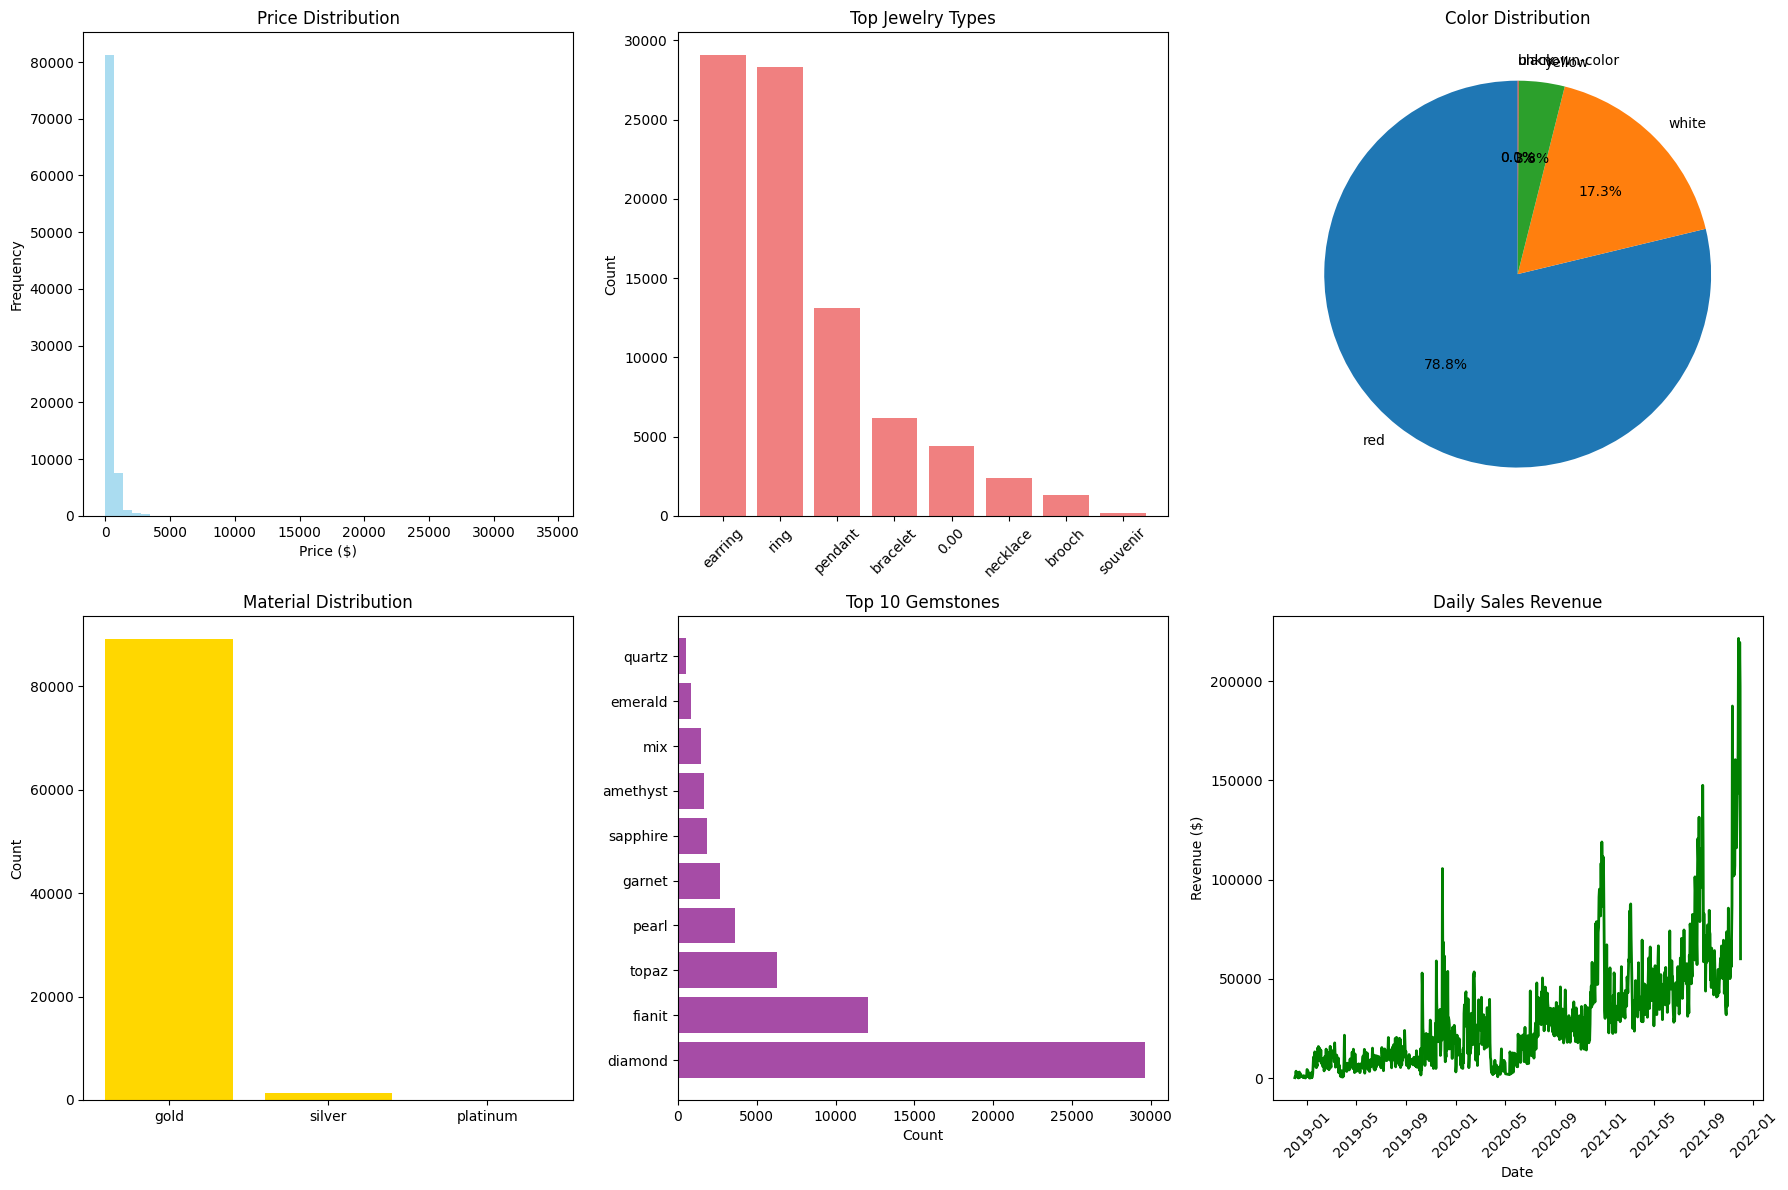

KEY BUSINESS METRICS:
Total Revenue: $32801286.37
Average Order Value: $362.21
Total Transactions: 95910
Unique Customers: 25


In [8]:
# Create visualizations for key insights
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Price distribution
axes[0, 0].hist(df['price'].dropna(), bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')

# 2. Jewelry types
jewelry_counts = df['jewelry_type'].value_counts().head(8)
axes[0, 1].bar(range(len(jewelry_counts)), jewelry_counts.values, color='lightcoral')
axes[0, 1].set_title('Top Jewelry Types')
axes[0, 1].set_xticks(range(len(jewelry_counts)))
axes[0, 1].set_xticklabels([x.replace('jewelry.', '') for x in jewelry_counts.index], rotation=45)
axes[0, 1].set_ylabel('Count')

# 3. Color distribution
color_counts = df['color'].value_counts()
axes[0, 2].pie(color_counts.values, labels=color_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Color Distribution')

# 4. Material distribution
material_counts = df['material'].value_counts()
axes[1, 0].bar(material_counts.index, material_counts.values, color='gold')
axes[1, 0].set_title('Material Distribution')
axes[1, 0].set_ylabel('Count')

# 5. Top gemstones
gemstone_counts = df['gemstone'].value_counts().head(10)
axes[1, 1].barh(range(len(gemstone_counts)), gemstone_counts.values, color='purple', alpha=0.7)
axes[1, 1].set_title('Top 10 Gemstones')
axes[1, 1].set_yticks(range(len(gemstone_counts)))
axes[1, 1].set_yticklabels(gemstone_counts.index)
axes[1, 1].set_xlabel('Count')

# 6. Sales over time
df_time = df.dropna(subset=['timestamp', 'price'])
daily_sales = df_time.groupby(df_time['timestamp'].dt.date)['price'].sum()
axes[1, 2].plot(daily_sales.index, daily_sales.values, color='green', linewidth=2)
axes[1, 2].set_title('Daily Sales Revenue')
axes[1, 2].set_xlabel('Date')
axes[1, 2].set_ylabel('Revenue ($)')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate key metrics
total_revenue = df['price'].sum()
avg_order_value = df['price'].mean()
total_transactions = len(df)
unique_customers = df['customer_id'].nunique()

print("KEY BUSINESS METRICS:")
print("Total Revenue: $" + str(round(total_revenue, 2)))
print("Average Order Value: $" + str(round(avg_order_value, 2)))
print("Total Transactions: " + str(total_transactions))
print("Unique Customers: " + str(unique_customers))

**Description**
This code snippet focuses on visualizing jewelry sales data and extracting important business insights. It creates multiple subplots to display various charts, including:

* A histogram showing the distribution of product prices.
* A bar chart of the most popular jewelry types.
* A pie chart representing the color distribution.
* A bar chart for material usage.
* A horizontal bar chart showing the most common gemstones.
* A line plot of daily sales revenue over time.

Additionally, it calculates and prints key business metrics such as total revenue, average order value, total number of transactions, and the number of unique customers. These visual and numeric insights help in understanding sales performance and customer behavior.


In [9]:
# Additional analysis for deeper insights
print("DETAILED INSIGHTS FOR PRESENTATION:")
print("="*50)

# Price analysis by jewelry type
print("\
1. AVERAGE PRICE BY JEWELRY TYPE:")
price_by_type = df.groupby('jewelry_type')['price'].agg(['mean', 'count']).round(2)
price_by_type = price_by_type[price_by_type['count'] > 100]  # Filter for significant categories
price_by_type = price_by_type.sort_values('mean', ascending=False)
print(price_by_type.head(10))

# Revenue by jewelry type
print("\
2. TOTAL REVENUE BY JEWELRY TYPE:")
revenue_by_type = df.groupby('jewelry_type')['price'].sum().sort_values(ascending=False)
print(revenue_by_type.head(10).round(2))

# Color preferences and pricing
print("\
3. COLOR ANALYSIS:")
color_analysis = df.groupby('color').agg({
    'price': ['mean', 'sum', 'count']
}).round(2)
color_analysis.columns = ['avg_price', 'total_revenue', 'count']
color_analysis = color_analysis.sort_values('total_revenue', ascending=False)
print(color_analysis)

# Material analysis
print("\
4. MATERIAL ANALYSIS:")
material_analysis = df.groupby('material').agg({
    'price': ['mean', 'sum', 'count']
}).round(2)
material_analysis.columns = ['avg_price', 'total_revenue', 'count']
print(material_analysis)

# Gemstone value analysis
print("\
5. TOP GEMSTONES BY REVENUE:")
gemstone_revenue = df.groupby('gemstone')['price'].sum().sort_values(ascending=False)
print(gemstone_revenue.head(10).round(2))

# Time-based analysis
print("\
6. MONTHLY SALES TRENDS:")
df['month'] = df['timestamp'].dt.to_period('M')
monthly_sales = df.groupby('month').agg({
    'price': 'sum',
    'transaction_id': 'count'
}).round(2)
monthly_sales.columns = ['revenue', 'transactions']
print(monthly_sales)

DETAILED INSIGHTS FOR PRESENTATION:
1. AVERAGE PRICE BY JEWELRY TYPE:
                      mean  count
jewelry_type                     
jewelry.bracelet    493.94   6188
electronics.clocks  425.35    167
jewelry.earring     396.26  29051
jewelry.necklace    387.68   2361
jewelry.ring        366.24  28300
jewelry.brooch      224.88   1288
jewelry.pendant     168.14  13088
jewelry.souvenir     36.79    170
2. TOTAL REVENUE BY JEWELRY TYPE:
jewelry_type
jewelry.earring       11511652.07
jewelry.ring          10364450.88
jewelry.bracelet       3056475.12
jewelry.pendant        2200662.97
jewelry.necklace        915307.77
jewelry.brooch          289639.41
electronics.clocks       71032.78
jewelry.souvenir          6255.06
jewelry.stud              3629.08
0.00                         0.00
Name: price, dtype: float64
3. COLOR ANALYSIS:
               avg_price  total_revenue  count
color                                         
red               348.56    24228494.88  69510
white          

<ipython-input-9-4bc18ab11b45>:47: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M')


**Description:**
This code snippet performs an in-depth analysis of jewelry sales data to uncover trends and insights. It groups the data by jewelry type, color, material, and gemstone to calculate metrics like average price, total revenue, and item counts. It also identifies top-performing gemstones based on revenue. Additionally, it analyzes monthly sales trends by aggregating revenue and transaction counts, helping to understand seasonal patterns and customer preferences.
